In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import IPython

---
## Question 1:

Read chapter 4 from Haykin’s book (2nd edition), starting from section 4.1 to 4.6(including 4.6). Summarize or sketch your insights in mind-map or an outline or a summary.

---
## Question 2:

For this task you have to program the back-propogation (BP) for multi layered perceptron (MLP). Design your implementation for general NN with arbitrary many hidden layers. The test case is as follows:  2-2-1 multi layered perceptron (MLP) with sigmoid activation function on XOR data.

In [180]:
class NeuralNetwork():
    """
    3 layer neural network with 1 input layer, 1 hidden layer, 
    1 output layer...
    2-2-1 Neural Network..
    """
    def __init__(self, num_hidden_neurons = 2, learning_rate = 1, epochs = 10000,
                 num_inputs = 2, zero_weight_init = False, epsilon= 1e-2):
        # Layer 0 --> input, Layer 1 --> hidden, Layer 2 --> output
        if zero_weight_init == False:
            np.random.seed(0)
            # weights randomly initialized...
            self.w_layer01 = np.random.rand(num_inputs, num_hidden_neurons)
            self.w_layer12 = np.random.rand(num_hidden_neurons, 1)
        else:
            # weights initialized to zero...
            self.w_layer01 = np.zeros((num_inputs, num_hidden_neurons))
            self.w_layer12 = np.zeros((num_hidden_neurons, 1))
            
        self.num_hidden_neurons = num_hidden_neurons
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epochs = epochs
        
    def non_linearity(self, value, derivative = False):
        if derivative == True: # return slope of sigmoid..
            return value*(1. - value)
        # included to avoid overflow in numpy exponent..
        value = np.array(value, dtype = np.float128)
        value = np.clip( value, -500, 500 )
        # return sigmoid activation value...
        return 1./(1. + np.exp(-value)) 
        
    def train(self, input_array, output_array):
        iteration = 0
        while(True):
            layer0 = input_array
            layer1_local_field = input_array.dot(self.w_layer01)
            layer1_output = self.non_linearity(layer1_local_field)
            
            layer2_local_field = layer1_output.dot(self.w_layer12)
            layer2_output = self.non_linearity(layer2_local_field)
        
            layer2_error = -(output_array - layer2_output)
            layer2_delta = layer2_error * self.non_linearity(
                layer2_error, derivative = True)
        
            layer1_error = layer2_delta.dot(self.w_layer12.T)
            layer1_delta = layer1_error * self.non_linearity(
                layer1_error, derivative = True)
            
            # update weights based on error and slope of sigmoid...
            self.w_layer12 -= self.learning_rate * (
                layer1_output.T.dot(layer2_delta))
            self.w_layer01 -= self.learning_rate * (
                layer0.T.dot(layer1_delta))
            
            training_error = np.mean(np.abs(layer2_error))
            
            if iteration % 1000 == 0:
                print 'Epoch: ', iteration, '......', 'Training Error: ', (
                    training_error)
            
            if iteration > self.epochs or training_error < self.epsilon:
                break
                
            iteration += 1
                
        # training error at the end of epochs is returned...
        print '-----------------------------------------------------------'
        if iteration > self.epochs:
            print 'Max epochs reached...'
        else:
            print 'Epoch: ', iteration, '......', 'Training Error: ', (
                    training_error)
            print 'Error has converged...'
        print '-----------------------------------------------------------'
        return training_error
                
    def predict(self, input_array, desired_array):
        layer0 = input_array
        layer1_local_field = input_array.dot(self.w_layer01)
        layer1_output = self.non_linearity(layer1_local_field)
        
        layer2_local_field = layer1_output.dot(self.w_layer12)
        layer2_output = self.non_linearity(layer2_local_field)
        
        layer2_error = layer2_output - desired_array
        
        # average generalization error is returned..
        return np.mean(np.abs(layer2_error))

In [181]:
# XOR..
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0.01, 0.01, 0]).reshape(-1, 1)

print input_data.shape
print labels.shape

(4, 2)
(4, 1)


## 2) a) Experiments with initial weights

### i) Train the network with zero initial weights i.e. $w_{ij} = 0$.

In [182]:
network = NeuralNetwork(zero_weight_init= True, epsilon= 1e-2)
error = network.train(input_data, labels)

Epoch:  0 ...... Training Error:  0.495
Epoch:  1000 ...... Training Error:  0.0165656859284
Epoch:  2000 ...... Training Error:  0.0107385823234
-----------------------------------------------------------
Epoch:  2224 ...... Training Error:  0.00999815399291
Error has converged...
-----------------------------------------------------------


## ii) Train with random initial weights:

In [183]:
network = NeuralNetwork(zero_weight_init= False, epsilon= 1e-2)
error = network.train(input_data, labels)

Epoch:  0 ...... Training Error:  0.659731235149
-----------------------------------------------------------
Epoch:  944 ...... Training Error:  0.00999384933498
Error has converged...
-----------------------------------------------------------


## Comparision and Comments on convergence:

---

## b. Experiment with different learning rates e.g. 0.1, 0.3, 0.5, 0.9:

In [184]:
learning_rates = [0.1, 0.3, 0.5, 0.9]
converged_error = list()
for rate in learning_rates:
    network = NeuralNetwork(learning_rate=rate)
    converged_error.append(network.train(input_data, labels))

print 'Errors after convergence [learning_rate, converged error]'
result = np.array(zip(learning_rates, converged_error))
print result

Epoch:  0 ...... Training Error:  0.659731235149
Epoch:  1000 ...... Training Error:  0.0425660236693
Epoch:  2000 ...... Training Error:  0.0280664773992
Epoch:  3000 ...... Training Error:  0.0218484476218
Epoch:  4000 ...... Training Error:  0.0181890722302
Epoch:  5000 ...... Training Error:  0.0157060336288
Epoch:  6000 ...... Training Error:  0.0138769812662
Epoch:  7000 ...... Training Error:  0.012455364509
Epoch:  8000 ...... Training Error:  0.0113077410483
Epoch:  9000 ...... Training Error:  0.0103547949924
-----------------------------------------------------------
Epoch:  9420 ...... Training Error:  0.00999979785709
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.659731235149
Epoch:  1000 ...... Training Error:  0.0218313086386
Epoch:  2000 ...... Training Error:  0.0138739778705
Epoch:  3000 ...... Training Error:  0.0103554773816
-----------------------------------------------------------
Epoch:  31

## Compare the convergence and plot some resulting surfaces:

## Plot:

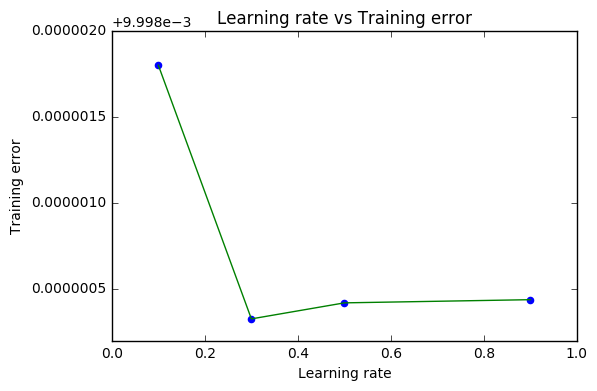

In [185]:
plt.plot(result[:,0], result[:,1], color = 'g')
plt.xlabel('Learning rate')
plt.ylabel('Training error')
plt.title('Learning rate vs Training error')
plt.scatter(result[:,0], result[:,1], color = 'b')
plt.show()

## Comparision of convergence:

---

## Question 3:

Investigate the use of back-propagation learning using a sigmoidal nonlinearity to achieve one-to-one mappings, as described here:

For each mapping, do the following:

1. Set up two sets of data, one for network training, and the other for testing.

2. Use the training data set to compute the synaptic weights of the network, assumed to have a single hidden layer.

3. Evaluate the computation accuracy of the network by using the test data. Use a single hidden layer but with a variable number of hidden neurons. Investigate how the network performance is affected by varying the size of the hidden layer.

1) $$F(x) = \frac{1}{x}; 1<= x <=100$$

In [186]:
def split_data(x, y):
    data = np.hstack((x, y))
    np.random.seed(0)
    np.random.shuffle(data)
    return np.vsplit(data, [data.shape[0]*8/10])

In [187]:
reciprocal_x = np.arange(1, 101, dtype= np.float32).reshape(-1, 1)
reciprocal_y = 1/reciprocal_x
train_data_r, test_data_r = split_data(reciprocal_x, reciprocal_y)

In [189]:
hidden_neurons = [1, 2, 3, 4, 5]
train_error = []
test_error = []

for number in hidden_neurons:
    network = NeuralNetwork(num_inputs= 1,
                            num_hidden_neurons= number)
    train_error.append(network.train(train_data_r[:,:-1],
                                     train_data_r[:,-1:]))
    test_error.append(network.predict(test_data_r[:,:-1],
                                     test_data_r[:,-1:]))

Epoch:  0 ...... Training Error:  0.621064923263
Epoch:  1000 ...... Training Error:  0.45436776235
Epoch:  2000 ...... Training Error:  0.45436776235
Epoch:  3000 ...... Training Error:  0.45436776235
Epoch:  4000 ...... Training Error:  0.45436776235
Epoch:  5000 ...... Training Error:  0.45436776235
Epoch:  6000 ...... Training Error:  0.45436776235
Epoch:  7000 ...... Training Error:  0.45436776235
Epoch:  8000 ...... Training Error:  0.45436776235
Epoch:  9000 ...... Training Error:  0.45436776235
Epoch:  10000 ...... Training Error:  0.45436776235
-----------------------------------------------------------
Max epochs reached...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.706512351766
Epoch:  1000 ...... Training Error:  0.45436776235
Epoch:  2000 ...... Training Error:  0.45436776235
Epoch:  3000 ...... Training Error:  0.45436776235
Epoch:  4000 ...... Training Error:  0.45436776235
Epoch:  5000 ...... Training Error:  0.454367